In [1]:
import pandas as pd
import numpy as np

In [2]:
# cols are backwards remember
df = pd.read_csv("/Users/Rutherford/Desktop/12_9_relabeled.csv",usecols=(1,2,3,4,5,6))

In [4]:
df = df.drop(2204)

In [6]:
w2v_dat = "/Users/Rutherford/Desktop/formerly on desktop/data/embed.dat"
w2v_vocab = "/Users/Rutherford/Desktop/formerly on desktop/data/embed.vocab"

# create word embeddings and mapping of vocabulary item to index
embeddings = np.memmap(w2v_dat, dtype=np.float64,
                            mode="r", shape=(3000000, 300))
with open(w2v_vocab) as f:
    vocab_list = map(lambda string: string.strip(), f.readlines())
vocab_dict = {w: i for i, w in enumerate(vocab_list)}

(1,"going","doing"),
(1,"doing","going"),

(1,"one","i"),
(1,"i","one"),
(1,"two","ii"),
(1,"ii","two"),
(1,"three","iii"),
(1,"iii","three"),
(1,"four","iv"),
(1,"iv","four"),
(1,"five","v"),
(1,"v","five"),

(1,"cannot","will not"),

(2,"thing","think")


### should already be fixed but still missing them.
### why not take a look at those with simlar values for the three! see the boundary
#(2,"can","cannot"),
#(2,"cannot","can"),



### changed my mind don't think these are minor
#(1,"first","one"),
#(1,"one","first"),
#(1,"second","two"),
#(1,"two","second"),
#(1,"third","three"),
#(1,"three","third"),




#additions = 
pd.DataFrame({
                "error":[1,1,1,1,1,1],
                "one":["i","first","ii","second","iii","three"],
                "two":["first","i","second","ii","third","iii"]})

#(sing["one"]=="i")|(sing["two"]=="i")

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import pylab
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
mins,majs = df.groupby("error")

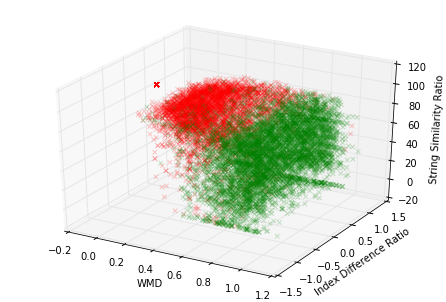

In [9]:
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(mins[1]['wmd'],
           mins[1]['index_diff'], 
           mins[1]['ratio'],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(majs[1]['wmd'],
          majs[1]['index_diff'],
          majs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

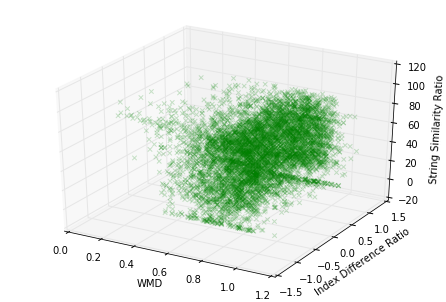

In [10]:
fig = pylab.figure()
ax = Axes3D(fig)


#ax.scatter(mins[1]['wmd'],
#           mins[1]['index_diff'], 
#           mins[1]['ratio'],
#           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(majs[1]['wmd'],
          majs[1]['index_diff'],
          majs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

## The model never sees numbers, so no point training on them

## Wait a minute -- just clean it as you do the incoming data

In [62]:
#nums = ["{}".format(i) for i in range(10)]
#df[((df.apply(lambda x: any([num in x["one"] for num in nums]),axis=1))|
#   (df.apply(lambda x: any([num in x["two"] for num in nums]),axis=1)))&
#  (df.apply(lambda x: len(x["one"])>2,axis=1))]
#df = df[~(df.apply(lambda x: any([num in x["one"] for num in nums]),axis=1))&
#   ~(df.apply(lambda x: any([num in x["two"] for num in nums]),axis=1))]

#mins[1][mins[1]["wmd"]>.8]

In [11]:
spells = majs[1][(majs[1]["wmd"]<.4)&(majs[1]["ratio"]>80)]
#normal_majors = majs[1][~(majs[1]["wmd"]<.4)|~(majs[1]["ratio"]>80)]
others = np.setdiff1d(majs[1].index,spells.index)
normal_majors = majs[1].loc[others]

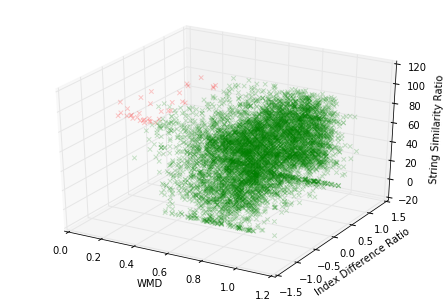

In [12]:
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(spells['wmd'],
           spells['index_diff'], 
           spells['ratio'],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(normal_majors['wmd'],
          normal_majors['index_diff'],
          normal_majors['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

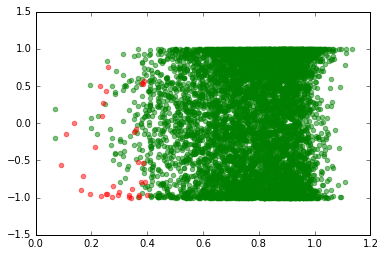

In [13]:
plt.scatter(normal_majors["wmd"],normal_majors["index_diff"],color="g",alpha=.5)
plt.scatter(spells["wmd"],spells["index_diff"],color="r",alpha=.5);

In [14]:
normal_majors[normal_majors["wmd"]<.38]

,error,one,two,ratio,index_diff,wmd
607,2,but,so,0,0.440678,0.313388
1179,2,do,think,0,0.450237,0.349623
1323,2,even,if,0,-0.275720,0.370722
1921,2,how,what,29,-0.252252,0.317932
2379,2,knee,hip,0,0.397375,0.283271
2966,2,oh,yeah,33,0.061981,0.353095
2983,2,okay,yeah,25,0.181848,0.336119
3901,2,so,but,0,-0.440677,0.313388
5319,2,actually,anyway,43,0.647586,0.315099
5485,2,anybody,everybody,63,-0.193200,0.273004


In [69]:
# yes there are metas in here

#df[(df["one"]=="chuckle")|(df["one"]=="laughter")|(df["one"]=="pause")|
#  (df["one"]=="noise")|(df["one"]=="music")|(df["one"]=="applause")|
#   (df["one"]=="vocalization")]

In [399]:
# adapted for this dataset

# filler words that will be removed
fillers = [
    "yeah","yes","yup","m+ hm+","uh huh","okay","right","alright","all right",

    "oh+","aha","um+","hm+","mm+",

    "i mean","i think","i guess","you know","kind of","kinda","like","really","actually","basically",

    "a","an","the",

    "and","of","or","so","to","on","in","it","that","am",#"is",

    "excuse me","so to speak","that's good",

    "s\d+","_+",
    
    "o'clock"
    ]

metas = [
    "chuckle","laughter","pause","noise","music","applause","vocalization",
    "video playback","automated voice","foreign language","overlapping conversation",
    "background conversation","start paren","end paren"
    ]


fillers = "\\b"+"\\b|\\b".join(fillers)+"\\b"
metas = "\\b"+"\\b|\\b".join(metas)+"\\b"

In [16]:
from scribie_num2text import num_to_text
import re

In [17]:
def num_replace(string):
    """Replace digits with spelled-out versions of the numbers they
    represent, using scribie_num2text
    """

    # grab a list of digits and a list of their string representations
    nums = re.findall("\d+",string)
    # extra spaces are to preserve mixes of letters and numbers
    words = [" "+num_to_text(num)+" " for num in nums]

    # iteratively replace digits with strings
    for num,word in zip(nums,words):
        string = re.sub(num,word,string)

    return string

In [18]:
def cleaner(strings):
    """Return individual cleaned string with casing, punctuation, metas,
    and fillers removed, numbers converted to words, and OOVs converted
    or removed.
    """

    # remove metas
    text = re.sub(metas,"",strings)
    
    text = re.sub("'til{1,2}","until",text)
    text = re.sub("'em","them",text)
    text = re.sub("'cause","because",text)
    text = re.sub("sorta\\b","sort of",text)
    text = re.sub("(d|g)oin'","\g<1>oing ",text)    

    text = re.sub("'m"," am",text) # there's no i'm in the current training set because it's oov
    text = re.sub("'ve"," have",text)
    text = re.sub("'ll"," will",text)

    ### currently, cannot->can is major, vice-versa is minor ###
    # and can->can't and can't->can are minor
    text = re.sub("can't","cannot",text) #

    text = re.sub("won't","will not",text)
    text = re.sub("ain't","are not",text)
    text = re.sub("n't"," not",text)
    text = re.sub("'s\\b","",text)
    text = re.sub("'d\\b","",text)

    # any ordinals with 1st/2nd/3rd are fixed
    # others have many exceptions, so just convert to cardinals
    text = re.sub("(\d*)(1st)","\g<1>0 first",text)
    text = re.sub("(\d*)(2nd)","\g<1>0 second",text)
    text = re.sub("(\d*)(3rd)","\g<1>0 third",text)
    text = re.sub("(\d*)(4th)","\g<1>0 fourth",text)
    text = re.sub("(\d*)(5th)","\g<1>0 fifth",text)
    text = re.sub("(\d*)(6th)","\g<1>0 sixth",text)
    text = re.sub("(\d*)(7th)","\g<1>0 seventh",text)
    text = re.sub("(\d*)(8th)","\g<1>0 eighth",text)
    text = re.sub("(\d*)(9th)","\g<1>0 ninth",text)

    # remove fillers
    text = re.sub(fillers,"",text)

    # replace digits
    text = num_replace(text)

    text = " ".join(text.split())

    return text

In [19]:
df.loc[1274,"error"]=1

In [21]:
df["one"] = df["one"].apply(cleaner)
df["two"] = df["two"].apply(cleaner)

In [22]:
df = df[df["one"]!=df["two"]]
df = df[df["two"]!=""]
df = df[df["one"]!=""]

In [23]:
df = df[["error","one","two"]]

In [24]:
def str_ratio(string1,string2):
    """Get the string similarity as a ratio from fuzzywuzzy, using Levenshtein distance
    """
    #string1,string2 = strings[1],strings[2]
    ratio = fuzz.ratio(string1,string2)

    return ratio

def indexer(string1,string2):
    """Get the ratio of mean index difference between the two strings
    """
    eps = 1e-4
    #string1,string2 = strings[1],strings[2]

    s1_features = string1.split()
    s2_features = string2.split()

    # indices of words in each string
    s1_idx = [vocab_dict[word] for word in s1_features]
    s2_idx = [vocab_dict[word] for word in s2_features]

    # taking mean index of each string
    ### now thinking sum is better, test later ###
    #s1 = np.mean(s1_idx)
    #s2 = np.mean(s2_idx)
    s1 = sum(s1_idx)
    s2 = sum(s2_idx)

    diff = float(s2-s1+eps)/(s2+s1+eps)

    return diff

def wmd_getter(s1_in,s2_in):
    """Get the Word Mover's Distance between the two strings, using cosine distance
    between word2vec embeddings trained on GoogleNews, and Earth Mover's Distance from
    pyemd.
    """
    eps = 1e-4
    
    #s1_in,s2_in = strings[1],strings[2]
    
    vect = CountVectorizer(token_pattern='[\w\']+').fit([s1_in,s2_in])
    features = np.asarray(vect.get_feature_names())
    W_ = embeddings[[vocab_dict[w] for w in features]]

    # get 'flow' vectors
    v_1, v_2 = vect.transform([s1_in, s2_in])
    v_1 = v_1.toarray().ravel().astype(np.float64)
    v_2 = v_2.toarray().ravel().astype(np.float64)

    # normalize vectors so as not to reward shorter strings in WMD
    v_1 /= (v_1.sum()+eps)
    v_2 /= (v_2.sum()+eps)

    D_cosine = 1.-cosine_similarity(W_).astype(np.float64)

    # using EMD (Earth Mover's Distance) from PyEMD
    distances_cosine = emd(v_1,v_2,D_cosine)

    return distances_cosine


def generate(strings):
    """Return a numpy array of the values for each metric calclulated
    between the two strings
    """
    str1,str2 = strings[0],strings[1]
    
    # NOW GETTING rid of all blank strings first
    
    # don't allow blank strings into the calculations
    # str2 will not be blank, as that check comes before this
    #if str1 == "":
    #    # "unk" just happens to be a rare token in the Google vectors
    #    str1 = "unk"
    wmd = wmd_getter(str1,str2)
    idx = indexer(str1,str2)
    ratio = str_ratio(str1,str2)

    # proper format on which the model was trained
    #data = np.asarray([wmd,idx,ratio]).reshape([1,-1])[0]

    return wmd,idx,ratio

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from pyemd import emd
from fuzzywuzzy import fuzz
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
generate(df.ix[2][["one","two"]])

(0.7710352408905927, 0.6076347933133138, 60)

In [27]:
df.ix[:20]

,error,one,two
2,1,zone,zoning
6,1,sixth,six
13,2,aac,ase
14,1,aah,ahhh
16,2,one,any
17,2,one,as
18,2,one,at
19,1,abilities,capabilities
20,2,about,above


In [28]:
df["wmd"],df["index_diff"],df["ratio"] = zip(*df.apply(lambda row: generate([row[1],row[2]]),axis=1))

In [33]:
# some errors in here
mins[1][(mins[1]["index_diff"]<-.7)].head()

,error,one,two,wmd,index_diff,ratio
6,1,sixth,six,0.587455,-0.735399,75
35,1,acceptances,acceptance,0.645327,-0.806079,95
61,1,additionally,additional,0.569441,-0.945739,91
84,1,advantages,advantage,0.403034,-0.702699,95
85,1,adversities,adversity,0.253883,-0.736668,80


In [34]:
# fixing errors
df.loc[[436,693,825,860,976,1274,1502,1513,2195,2271,2413,2808,2994,3122,3156,3199,
        3333,3334,3395,3445,3449,4514,4779,6279,6798,8967,9035,9698,10514,11205],"error"]=2

In [41]:
#df.loc[((df["index_diff"]<-.96)&(df["ratio"]<.1))]

In [38]:
# change these back to minors
df.loc[[1987,1942],"error"]=1

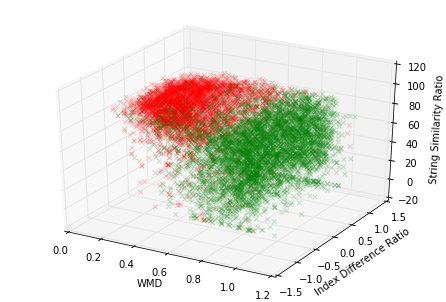

In [42]:
mins,majs=df.groupby("error")
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(mins[1]['wmd'],
           mins[1]['index_diff'], 
           mins[1]['ratio'],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(majs[1]['wmd'],
          majs[1]['index_diff'],
          majs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

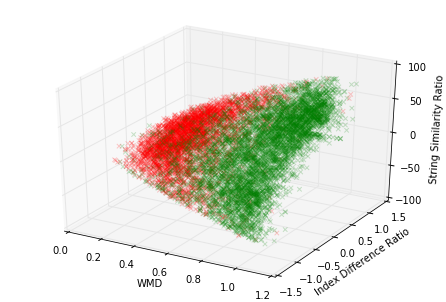

In [68]:
mins,majs=df.groupby("error")
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(mins[1]['wmd'],
           mins[1]['index_diff'], 
           mins[1]['ratio']*mins[1]['wmd']*mins[1]['index_diff'],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(majs[1]['wmd'],
          majs[1]['index_diff'],
          majs[1]['ratio']*majs[1]['wmd']*majs[1]['index_diff'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

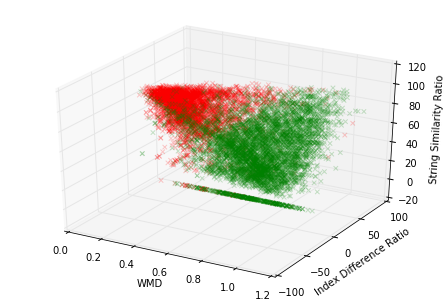

In [64]:
mins,majs=df.groupby("error")
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(mins[1]['wmd'], 
           mins[1]['ratio']*mins[1]['wmd']*mins[1]['index_diff'],
           mins[1]["ratio"],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(majs[1]['wmd'],
          majs[1]['ratio']*majs[1]['wmd']*majs[1]['index_diff'],
          majs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

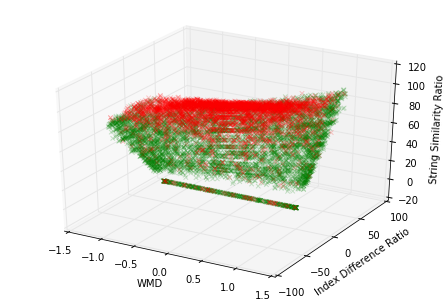

In [65]:
mins,majs=df.groupby("error")
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(mins[1]['index_diff'], 
           mins[1]['ratio']*mins[1]['wmd']*mins[1]['index_diff'],
           mins[1]["ratio"],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(majs[1]['index_diff'],
          majs[1]['ratio']*majs[1]['wmd']*majs[1]['index_diff'],
          majs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

## potentially a troublesome spot -- close misspellings that are in the embeddings are here, as are "un--" and "re--", but so are tense and number changes

In [43]:
close_spelling_maj = majs[1][(majs[1]["wmd"]<.5)&(majs[1]["ratio"]>75)]
others = np.setdiff1d(df.index,close_spelling_maj.index)
normal_majors = majs[1].ix[others]

In [46]:
close_spelling_maj

,error,one,two,wmd,index_diff,ratio
3199,2,peninsular,peninsula,0.360294,-0.778440,95
3333,2,preformed,performed,0.242099,-0.958782,89
3334,2,preform,perform,0.436672,-0.980969,86
3449,2,racers,races,0.445708,-0.742188,91
5281,2,abut,about,0.343344,-0.998708,89
5348,2,adulterous,adulteress,0.460886,0.474456,80
5357,2,advise,advice,0.439244,-0.615083,83
5369,2,affecting,effecting,0.454661,0.806759,89
5370,2,affective,effective,0.468876,-0.974881,89
5373,2,afferent,efferent,0.241917,0.271963,88


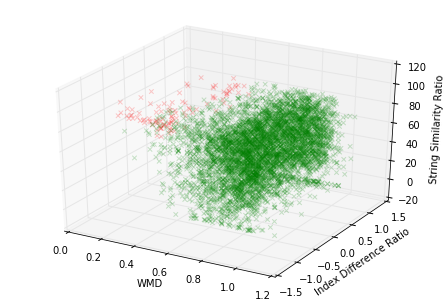

In [45]:
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(close_spelling_maj['wmd'],
           close_spelling_maj['index_diff'], 
           close_spelling_maj['ratio'],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(normal_majors['wmd'],
          normal_majors['index_diff'],
          normal_majors['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

## painful, but you should go through and make all spelling mistakes major

In [47]:
mins[1][(mins[1]["wmd"]<.5)&(mins[1]["ratio"]>75)]

,error,one,two,wmd,index_diff,ratio
19,1,abilities,capabilities,0.457162,-0.457548,86
32,1,abstract,abstracted,0.333540,0.751292,89
33,1,abutment,abutments,0.403128,0.140877,94
34,1,accept,accepts,0.313422,0.684111,92
37,1,accidents,accident,0.288975,-0.510074,94
38,1,accomplish,accomplished,0.257229,-0.141475,91
40,1,account,accounts,0.231629,0.285332,93
41,1,accused,accuse,0.246975,0.818213,92
42,1,achievements,achievement,0.291855,-0.071483,96
44,1,acquisitions,acquisition,0.227272,-0.390692,96


## come back and relabel more ^^

In [49]:
df.loc[1717,"error"]=2

In [50]:
mins[1][mins[1]["wmd"]>.8]

,error,one,two,wmd,index_diff,ratio
39,1,accord,accordance,0.867995,-0.255823,75
244,1,approached,approach,0.827274,-0.513745,89
319,1,aso,asos,0.858503,0.666078,86
418,1,backed,back,0.896170,-0.920866,80
471,1,beings,being,0.828326,-0.993522,91
495,1,bill,billy,0.949599,0.994378,89
496,1,billed,bill,0.904272,-0.876937,80
505,1,bis,business,0.916388,-0.998173,55
519,1,boe,bo,0.853527,0.473791,80
574,1,buck,bucky,0.838129,0.970876,89


In [448]:
df[["error","one","two"]]

,error,one,two
2,1,zone,zoning
6,1,sixth,six
13,2,aac,ase
14,1,aah,ahhh
16,2,one,any
17,2,one,as
18,2,one,at
19,1,abilities,capabilities
20,2,about,above
21,2,about,at


In [90]:
df["combo"] = df.apply(lambda row: row["wmd"]*row["index_diff"]*row["ratio"],axis=1)
df["last"] = df.apply(lambda row:float(ord(row["one"][-1])-96)/(ord(row["two"][-1])-96),axis=1)
df["last_one"] = df.apply(lambda row:ord(row["one"][-1])-96,axis=1)
df["last_two"] = df.apply(lambda row:ord(row["two"][-1])-96,axis=1)

In [72]:
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

In [100]:
X = df[["wmd","index_diff","ratio","last_one","last_two"]].copy()
y = df["error"].copy()

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=.7,random_state=33)

In [82]:
svc = SVC(C=1.5,kernel="poly",degree=2)

In [101]:
svc.fit(X_tr,y_tr)
#svc.fit(X,y)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
#0.9086434052410598 with three features
#0.9109598957579268 with "last"
#0.91313160561748952 with "last_one" and "last_two"
svc.score(X_te,y_te)

0.91313160561748952

In [103]:
preds = svc.predict(X)

In [104]:
#temp = df.loc[X_te.index,["error","one","two"]]
temp = df[["error","one","two"]].copy()

In [105]:
temp["predicted"] = preds

In [106]:
missed = temp[temp["error"]!=temp["predicted"]].index

In [116]:
df.ix[missed][df["error"]==2]

,error,one,two,wmd,index_diff,ratio,combo,last,last_one,last_two
254,2,are,are not,0.350038,0.254903,60,5.353549,0.250000,5,20
644,2,can,cannot,0.538542,0.999549,67,36.066036,0.700000,14,20
693,2,cellulites,cellulitis,0.607527,-0.724025,90,-39.587810,1.000000,19,19
825,2,complains,complaints,0.554919,-0.770561,95,-40.621933,1.000000,19,19
860,2,conservations,conversations,0.525338,-0.964049,85,-43.048396,1.000000,19,19
921,2,could have,have,0.297894,-0.641024,57,-10.884572,1.000000,5,5
1080,2,did not,did,0.156770,-0.065989,60,-0.620709,5.000000,20,4
1502,2,flue,flu,0.585879,-0.910667,86,-45.884466,0.238095,5,21
1611,2,gaye,danny,0.527815,-0.141630,44,-3.289197,0.200000,5,25
1726,2,had not,had,0.335915,-0.156625,60,-3.156768,5.000000,20,4


In [54]:
X_bad = df.ix[missed][["wmd","index_diff","ratio"]]
y_bad = df.ix[missed]["error"]

In [55]:
X_b_tr, X_b_te, y_b_tr, y_b_te = train_test_split(X_bad,y_bad,test_size=.33,random_state=33)

In [56]:
svc_bad = SVC(C=13,kernel="poly",degree=2)

In [57]:
svc_bad.fit(X_bad,y_bad)

SVC(C=13, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
#96% on test when trained on all bads. so what's in that 4%?
# EXACT SAME score for when trained on bad_train???

In [59]:
# C = 13
svc_bad.score(X_bad,y_bad)

0.96763754045307449

In [60]:
preds_bad = svc_bad.predict(X_bad)

In [61]:
bad = df.ix[missed].copy()
bad["predicted"] = preds_bad

In [62]:
# STILL bad
bad[bad["error"]!=bad["predicted"]]

,error,one,two,wmd,index_diff,ratio,predicted
942,1,creep,creepy,0.714550,-0.039546,91,2
1179,2,do,think,0.349623,0.450237,0,1
1595,1,future,futures,0.744223,0.804390,92,2
2379,2,knee,hip,0.283271,0.397375,0,1
3258,1,pipe,piped,0.716854,0.662906,89,2
3769,1,seller,reseller,0.685667,0.493392,86,2
4616,1,training,train,0.616143,0.469314,77,2
4982,2,whether,if,0.388134,-0.614879,0,1
5716,2,bein,being,0.681598,-0.998759,89,1
5739,2,ben,been,0.661481,-0.999038,86,1


In [63]:
svc_bad.score(X,y)

0.089054869290433783

In [64]:
X_bad.shape[0]/float(X.shape[0])

0.08876759551852915

In [65]:
normal = svc.predict(X)
fallback = svc_bad.predict(X)

In [66]:
temp_compare = df.copy()

In [67]:
temp_compare["normal"] = normal
temp_compare["fallback"] = fallback

In [68]:
# these are the places where we want to trust fallback
# but how do we know when this is the case, because they disagree on almost everything
normal_missed = temp_compare[temp_compare["error"]!=temp_compare["normal"]].index.values
temp_compare[temp_compare["error"]!=temp_compare["normal"]]

,error,one,two,wmd,index_diff,ratio,normal,fallback
2,1,zone,zoning,0.771035,0.607635,60,2,1
6,1,sixth,six,0.587455,-0.735399,75,2,1
39,1,accord,accordance,0.867995,-0.255823,75,2,1
57,1,adapted,adaptive,0.705030,0.418950,80,2,1
126,1,alex,hans,0.476315,0.456279,25,2,1
129,1,alice,allison,0.467881,0.058874,50,2,1
130,1,alicia,eileen,0.400068,0.286019,17,2,1
150,1,allow,let,0.443303,-0.039136,25,2,1
171,1,amalgamated,amalgam,0.729323,-0.124629,78,2,1
180,1,amin,ameen,0.564847,0.548154,67,2,1


In [69]:
agree = temp_compare[temp_compare["normal"]==temp_compare["fallback"]].index.values
temp_compare[temp_compare["normal"]==temp_compare["fallback"]]

,error,one,two,wmd,index_diff,ratio,normal,fallback
112,1,ahh,agh,0.551136,0.831863,67,1,1
942,1,creep,creepy,0.714550,-0.039546,91,2,2
1179,2,do,think,0.349623,0.450237,0,1,1
1247,1,elective,elected,0.623855,-0.868065,80,1,1
1595,1,future,futures,0.744223,0.804390,92,2,2
1697,1,greater,great,0.643387,-0.691151,83,1,1
1852,1,hey,they,0.659566,-0.995511,86,1,1
1878,1,his,my,0.392554,0.657895,0,1,1
2379,2,knee,hip,0.283271,0.397375,0,1,1
2793,1,mostly,most,0.620349,-0.886752,80,1,1


In [70]:
np.setdiff1d(agree,normal_missed)

array([  112,  1247,  1697,  1852,  1878,  2793,  3939,  4093,  4779,
        4898,  5138,  5658,  5717,  5748,  5992,  7115,  7510,  7544,
        7579,  7705,  7999,  8356,  8707,  8899,  9277,  9524,  9677,
       10719, 10799, 10800, 10910, 10935, 11181])

In [71]:
missmins,missmajs = df.loc[normal_missed].groupby("error")

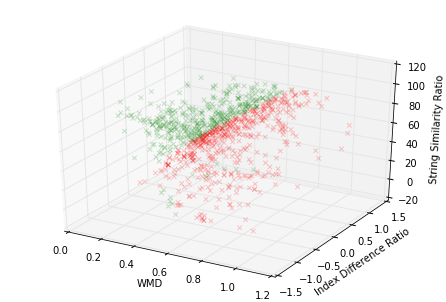

In [72]:
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(missmins[1]['wmd'],
           missmins[1]['index_diff'], 
           missmins[1]['ratio'],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(missmajs[1]['wmd'],
          missmajs[1]['index_diff'],
          missmajs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

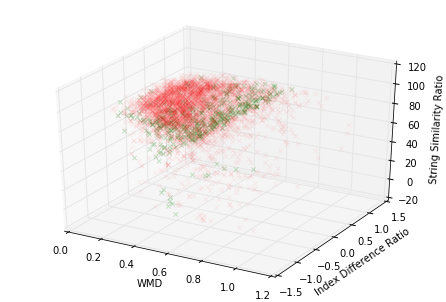

In [73]:
mins,majs=df.groupby("error")
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(mins[1]['wmd'],
           mins[1]['index_diff'], 
           mins[1]['ratio'],
           edgecolor="r",c="r",alpha=.05,marker="x")
ax.scatter(missmajs[1]['wmd'],
          missmajs[1]['index_diff'],
          missmajs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

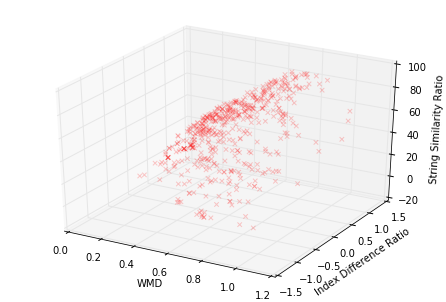

In [74]:
mins,majs=df.groupby("error")
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(missmins[1]['wmd'],
           missmins[1]['index_diff'], 
           missmins[1]['ratio'],
           edgecolor="r",c="r",alpha=.2,marker="x")
#ax.scatter(majs[1]['wmd'],
#          majs[1]['index_diff'],
#          majs[1]['ratio'],
#          edgecolor="g",c="g",alpha=.05,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

### visualizing missed vs got

In [105]:
#normal_missed = temp_compare[temp_compare["error"]!=temp_compare["normal"]].index.values
normal_got = temp_compare[temp_compare["error"]==temp_compare["normal"]].index.values

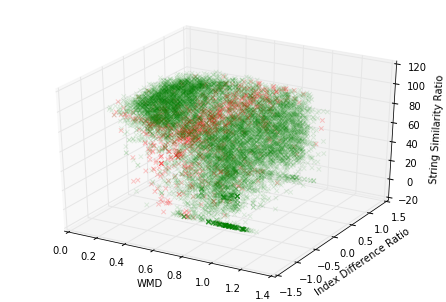

In [113]:
goods = df.ix[normal_got].copy()
bads = df.ix[normal_missed].copy()
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(goods['wmd'],
           goods['index_diff'], 
           goods['ratio'],
           edgecolor="g",c="g",alpha=.1,marker="x")
ax.scatter(bads['wmd'],
          bads['index_diff'],
          bads['ratio'],
          edgecolor="r",c="r",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

In [150]:
bads_mid = bads[(bads["wmd"]>.4)&(bads["wmd"]<.8)&(bads["ratio"]>50)&(bads["index_diff"]<0)&(bads["index_diff"]<0)]
bads_outer = bads.ix[np.setdiff1d(bads.index.values,bads_mid.index.values)]

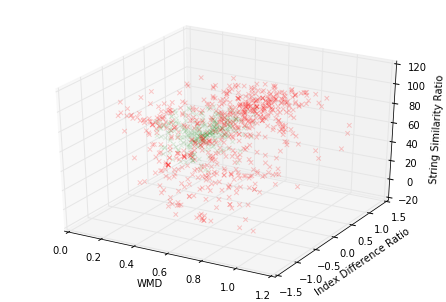

In [151]:
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(bads_mid['wmd'],
           bads_mid['index_diff'], 
           bads_mid['ratio'],
           edgecolor="g",c="g",alpha=.1,marker="x")
ax.scatter(bads_outer['wmd'],
          bads_outer['index_diff'],
          bads_outer['ratio'],
          edgecolor="r",c="r",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

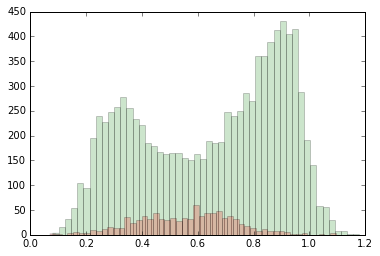

In [121]:
plt.hist(goods["wmd"],alpha=.2,color="green",bins=50)
plt.hist(bads["wmd"],alpha=.2,color="red",bins=50);

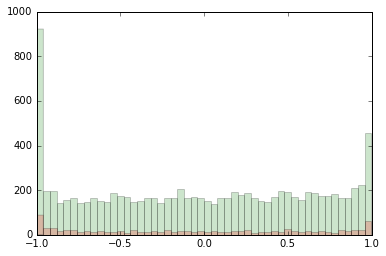

In [122]:
plt.hist(goods["index_diff"],alpha=.2,color="green",bins=50)
plt.hist(bads["index_diff"],alpha=.2,color="red",bins=50);

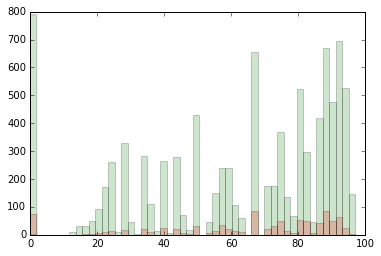

In [123]:
plt.hist(goods["ratio"],alpha=.2,color="green",bins=50)
plt.hist(bads["ratio"],alpha=.2,color="red",bins=50);

In [75]:
random_svc = SVC(kernel="poly",degree=3)

In [76]:
X_wmd_ratio = df[["wmd","ratio"]].copy()
y = df["error"].copy()

In [77]:
XJ_tr,XJ_te,YJ_tr,YJ_te = train_test_split(X_wmd_ratio,y,random_state=30,test_size=.83)

In [78]:
random_svc.fit(XJ_tr,YJ_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
random_svc.score(XJ_te,YJ_te)

0.91485925242270416

In [102]:
predos = pd.DataFrame(random_svc.predict(XJ_te),columns=["predicted"],index=XJ_te.index)

In [103]:
kernel_3 = pd.concat([df.loc[XJ_te.index,["one","two"]].copy(),XJ_te,YJ_te,predos],axis=1)

In [104]:
kernel_3[kernel_3["error"]!=kernel_3["predicted"]]

,one,two,wmd,ratio,error,predicted
436,bares,bears,0.638492,80,2,1
794,cohn,khan,0.832248,50,1,2
2402,landed,land,0.739755,80,1,2
417,back,backwards,0.608828,62,1,2
3457,rais,reyes,0.721452,44,1,2
6348,counsel,counseling,0.763402,82,1,2
9390,rein,reign,0.668600,89,2,1
6045,centered,center,0.706956,86,1,2
4676,ty,tyler,0.597251,57,1,2
9838,should,should not,0.235383,75,2,1


In [251]:
bad.describe()

,error,wmd,index_diff,ratio,predicted
count,907.000000,907.000000,907.000000,907.000000,907.000000
mean,1.467475,0.555896,-0.052160,64.561191,1.435502
std,0.499216,0.174661,0.665473,26.989070,0.496096
min,1.000000,0.070809,-0.999915,0.000000,1.000000
25%,1.000000,0.425601,-0.681119,50.000000,1.000000
50%,1.000000,0.568895,-0.085713,73.000000,1.000000
75%,2.000000,0.678793,0.531227,86.000000,2.000000
max,2.000000,1.095139,0.999945,97.000000,2.000000


In [305]:
goods = np.setdiff1d(df.index.values,missed.values)
good = df.ix[goods].copy()
good.describe()

,error,wmd,index_diff,ratio
count,9536.000000,9536.000000,9536.000000,9536.000000
mean,1.617135,0.647520,-0.028646,61.653314
std,0.486111,0.256748,0.641385,29.207885
min,1.000000,0.080604,-0.999997,0.000000
25%,1.000000,0.403481,-0.601336,40.000000
50%,2.000000,0.703932,-0.027363,67.000000
75%,2.000000,0.874828,0.540051,88.000000
max,2.000000,1.179369,0.999954,97.000000


In [293]:
badmins,badmajs = bad.groupby("error")

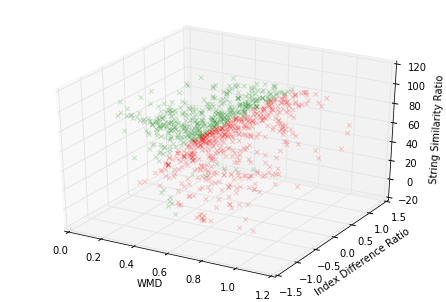

In [294]:
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(badmins[1]['wmd'],
           badmins[1]['index_diff'], 
           badmins[1]['ratio'],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(badmajs[1]['wmd'],
          badmajs[1]['index_diff'],
          badmajs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

In [400]:
def full_clean(strings):
    """Return individual cleaned string with casing, punctuation, metas,
    and fillers removed, numbers converted to words, and OOVs converted
    or removed.
    """

    # remove metas
    text = re.sub(metas,"",strings)
    
    text = re.sub("\\b\\d{6}\\b","timestamp",text)
    text = re.sub("\\b0\\d+\\b","timestamp",text)
    #text = re.sub("\\b0[^ ]*","timestamp",text)
    
    
    text = re.sub("-|:"," ",text)
    text = re.sub("'til{1,2}","until",text)
    text = re.sub("'em","them",text)
    text = re.sub("'cause","because",text)
    text = re.sub("sorta\\b","sort of",text)
    text = re.sub("(d|g)oin'","\g<1>oing ",text)    

    text = re.sub("'m"," am",text)
    text = re.sub("'ve"," have",text)
    text = re.sub("'ll"," will",text)

    ### currently, cannot->can is major, vice-versa is minor ###
    # and can->can't and can't->can are minor
    text = re.sub("can't","cannot",text) #

    text = re.sub("won't","will not",text)
    text = re.sub("ain't","are not",text)
    text = re.sub("n't"," not",text)
    text = re.sub("'s\\b","",text)
    text = re.sub("'d\\b","",text)

    # any ordinals with 1st/2nd/3rd are fixed
    # others have many exceptions, so just convert to cardinals
    text = re.sub("(\d*)(1st)","\g<1>0 first",text)
    text = re.sub("(\d*)(2nd)","\g<1>0 second",text)
    text = re.sub("(\d*)(3rd)","\g<1>0 third",text)
    text = re.sub("(\d*)(4th)","\g<1>0 fourth",text)
    text = re.sub("(\d*)(5th)","\g<1>0 fifth",text)
    text = re.sub("(\d*)(6th)","\g<1>0 sixth",text)
    text = re.sub("(\d*)(7th)","\g<1>0 seventh",text)
    text = re.sub("(\d*)(8th)","\g<1>0 eighth",text)
    text = re.sub("(\d*)(9th)","\g<1>0 ninth",text)

    # remove fillers
    text = re.sub(fillers,"",text)

    # replace digits
    text = num_replace(text)
    
    
    text = re.sub("\\bs\\b","",text)
    
    text = oov_clean(text)
    


    return text

In [401]:
def oov_clean(string):
    """Return the string with all OOVs removed
    """

    no_oov = " ".join([word for word in string.split()
                            if word in vocab_dict])

    return no_oov

In [402]:
full = pd.read_csv("/Users/Rutherford/Desktop/formerly on desktop/dataset.csv",na_filter=None,names=("error","one","two"))

In [397]:
#full.ix[[3004,3005,3006,7481,7515]]

In [403]:
full["one"] = full["one"].apply(full_clean)
full["two"] = full["two"].apply(full_clean)

In [388]:
#full.ix[[3004,3005,3006,7481,7515]]

In [404]:
full = full[full.apply(lambda row:("timestamp" not in row["one"])&("timestamp" not in row["two"]),axis=1)]
full = full[(full["one"]!="")&(full["two"]!="")]
full = full[full["one"]!=full["two"]]

In [349]:
#full.reset_index(drop=True,inplace=True)

In [405]:
full_mins,full_majs=full.groupby("error")

In [359]:
full["wmd"],full["index_diff"],full["ratio"] = zip(*full.apply(lambda row: generate([row[1],row[2]]),axis=1))

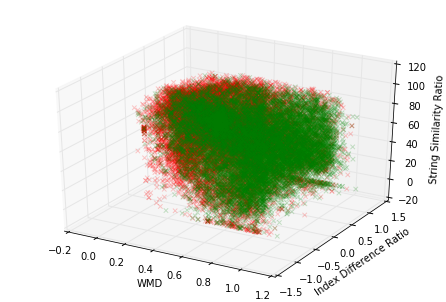

In [360]:
fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(full_mins[1]['wmd'],
           full_mins[1]['index_diff'], 
           full_mins[1]['ratio'],
           edgecolor="r",c="r",alpha=.2,marker="x")
ax.scatter(full_majs[1]['wmd'],
          full_majs[1]['index_diff'],
          full_majs[1]['ratio'],
          edgecolor="g",c="g",alpha=.2,marker="x")

ax.set_xlabel("WMD")
ax.set_ylabel("Index Difference Ratio")
ax.set_zlabel("String Similarity Ratio")
plt.show()

In [ ]:
svc3 = SVC()
xx = full[["wmd","index_diff","ratio"]].copy()
yy = full["error"].copy()
xtr,xte,ytr,yte = train_test_split(xx,yy,test_size=.33,random_state=15)
svc3.fit(xtr,ytr)

In [340]:
from IPython.display import clear_output

In [432]:
pd.options.display.max_colwidth = 50

In [436]:
to_minor = []
for i in xrange(full_majs[1].shape[0]):
    clear_output()
    print(full_majs[1].iloc[i][["one","two"]])
    answer =  raw_input("Change to minor?")
    if answer == "y":
        to_minor.append(full_majs[1].iloc[i].name)
    #changes = [idx for idx in input("Change to minor?").split()]
    #to_minor.extend(changes)

one            seventy one thousand some odd
two    seventy one thousand some odd dollars
Name: 56317, dtype: object


KeyboardInterrupt: 

In [437]:
to_minor

[56235, 56250, 56254, 56276, 56287, 56291, 56292, 56293, 56309, 56316]